In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os


In [4]:
df = pd.read_csv("C:/Users/chand/Downloads/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Data contains;

# age - age in years
# sex - (1 = male; 0 = female)
# cp - chest pain type
# trestbps - resting blood pressure (in mm Hg on admission to the hospital)
# chol - serum cholestoral in mg/dl
# fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg - resting electrocardiographic results
# thalach - maximum heart rate achieved
# exang - exercise induced angina (1 = yes; 0 = no)
# oldpeak - ST depression induced by exercise relative to rest
# slope - the slope of the peak exercise ST segment
# ca - number of major vessels (0-3) colored by flourosopy
# thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
# target - have disease or not (1=yes, 0=no)


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Checking Missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Data Exploration
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

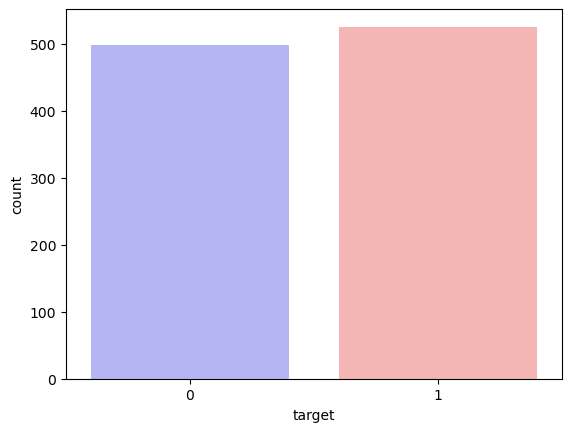

In [10]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [11]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients not Having Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Having Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients not Having Heart Disease: 48.68%
Percentage of Patients Having Heart Disease: 51.32%


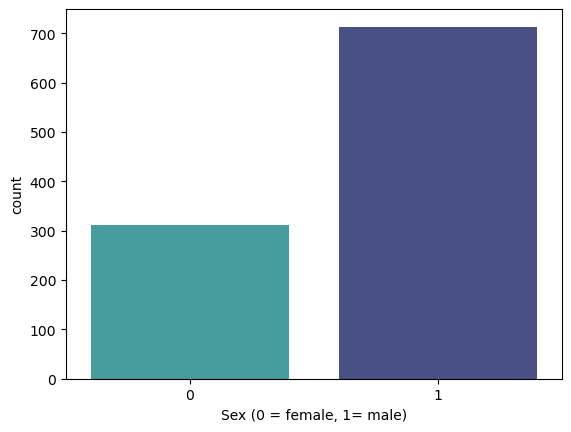

In [12]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [13]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [14]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


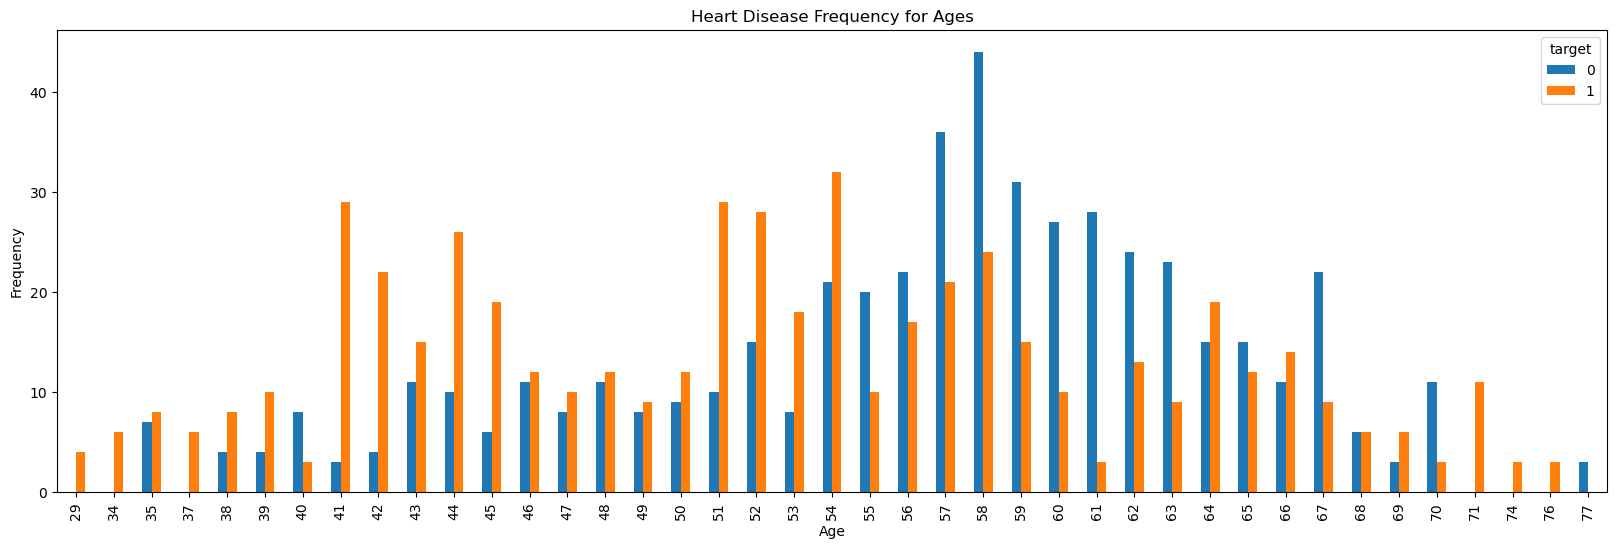

In [15]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

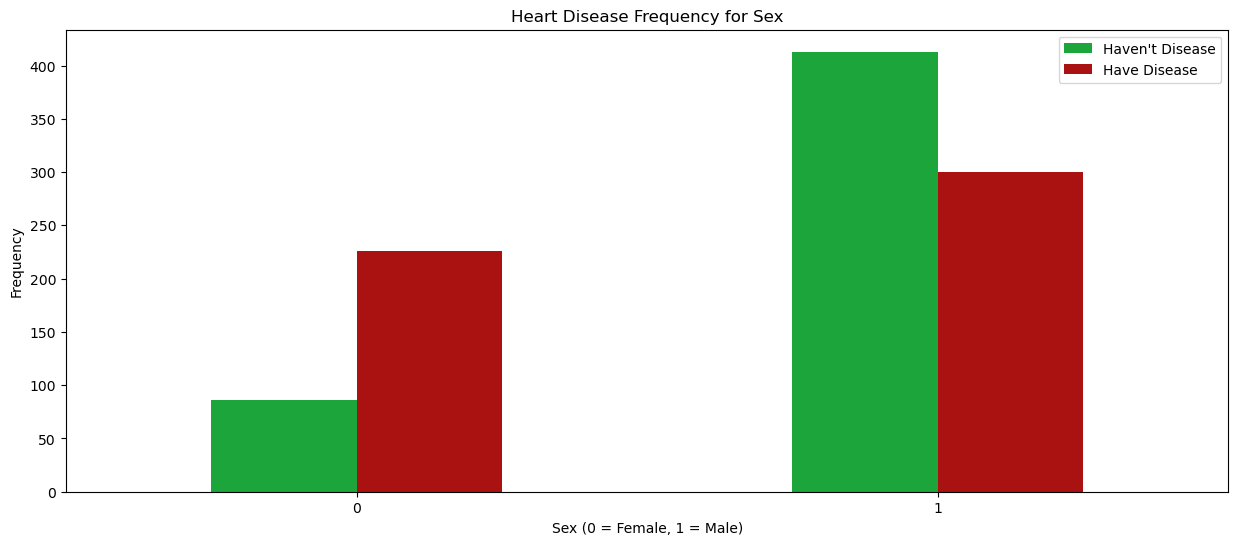

In [16]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


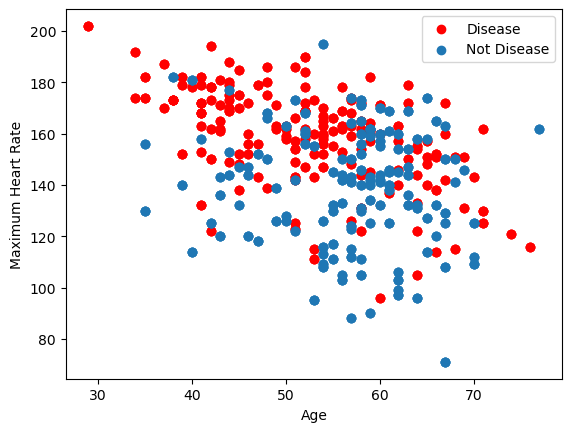

In [17]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


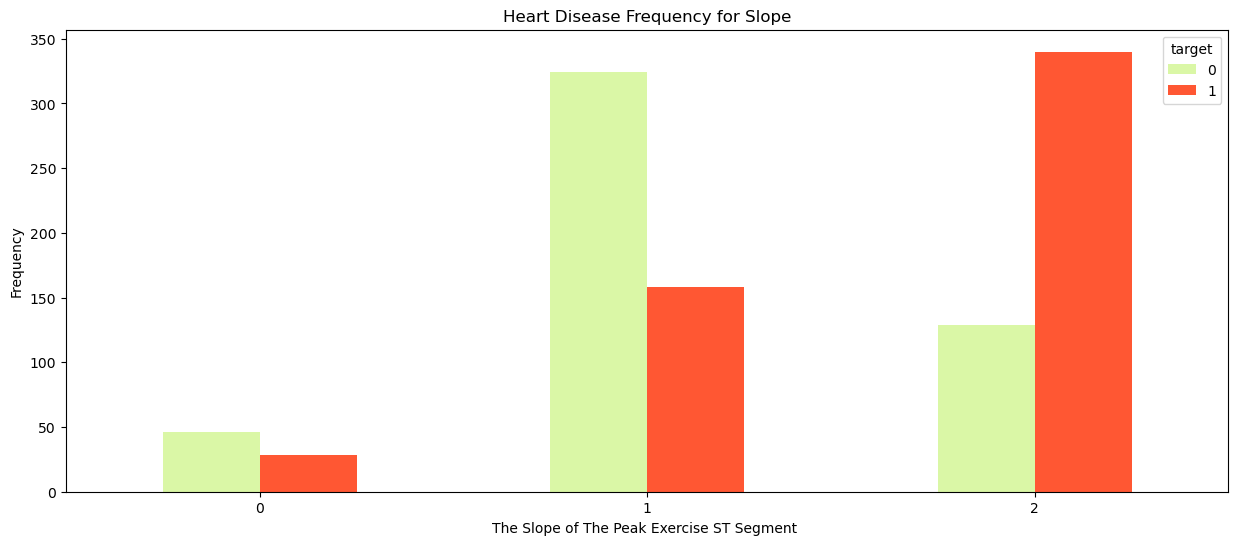

In [18]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()


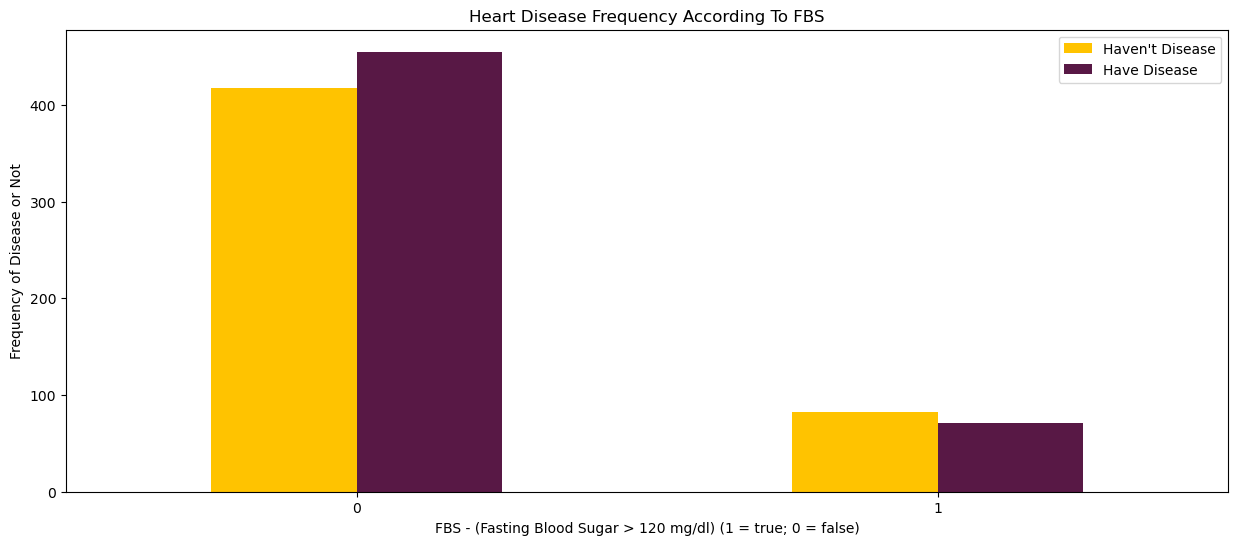

In [19]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

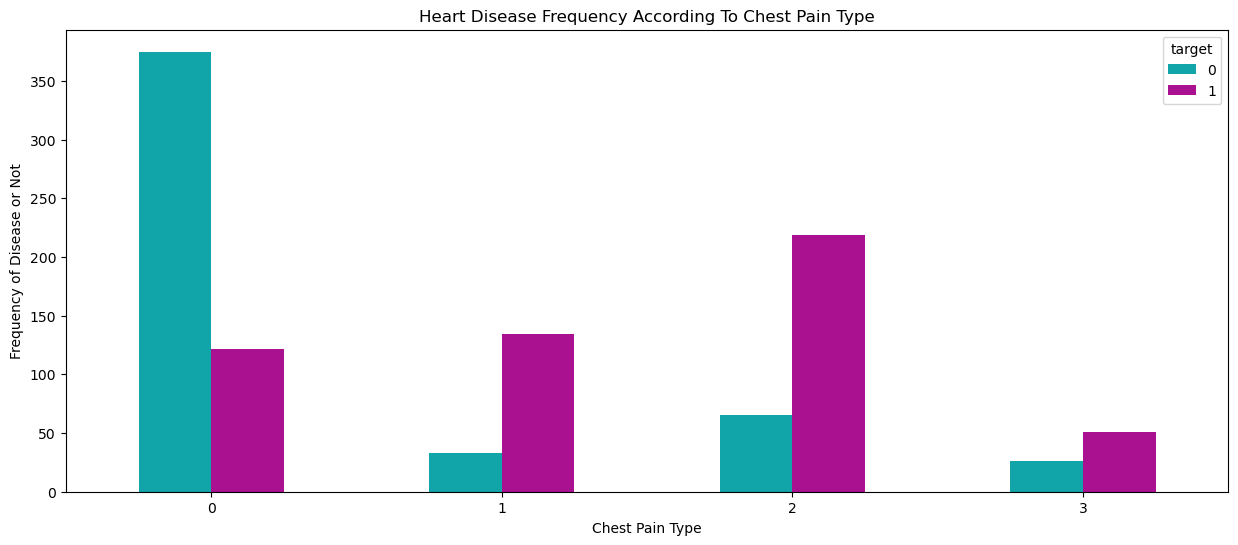

In [20]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [21]:
# Creating Dummy Variables
# Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [22]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [23]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [24]:
# Creating Model for Logistic Regression
# We can use sklearn library or we can write functions ourselves. Let's do them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [25]:
# Normalize Data

x = (x_data - np.min(x_data,axis=0)) / (np.max(x_data,axis=0) - np.min(x_data,axis=0)).values


In [26]:
# We will split our data. 80% of our data will be train data and 20% of it will be test data.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [27]:
#transpose matrices

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [28]:
# Let's say weight = 0.01 and bias = 0.0
# initialize


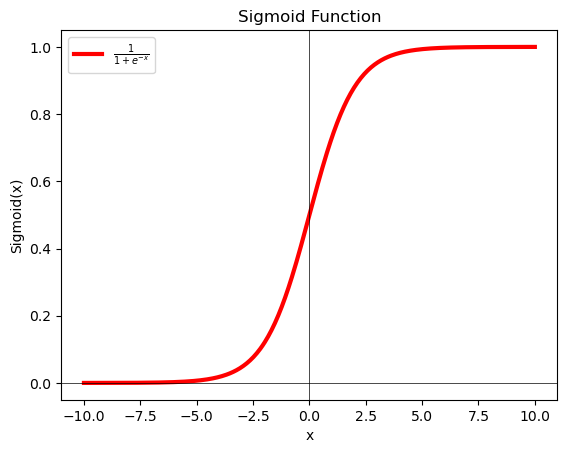

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Calculate y values using the sigmoid function
y = sigmoid(x)

# Create the plot
plt.plot(x, y, 'r-', label=r'$\frac{1}{1 + e^{-x}}$', linewidth=3)

# Add labels and title
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')

# Add grid and legend
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend(loc='best')

# Show the plot
plt.show()

Iteration 0, Cost: 0.6931471805599453
Iteration 100, Cost: 0.5004359327735508
Iteration 200, Cost: 0.43256332130771663
Iteration 300, Cost: 0.4002500113670606
Iteration 400, Cost: 0.3817796112541205
Iteration 500, Cost: 0.3699713444934887
Iteration 600, Cost: 0.3618430931635759
Iteration 700, Cost: 0.3559496392202222
Iteration 800, Cost: 0.3515097589621037
Iteration 900, Cost: 0.3480656015070688


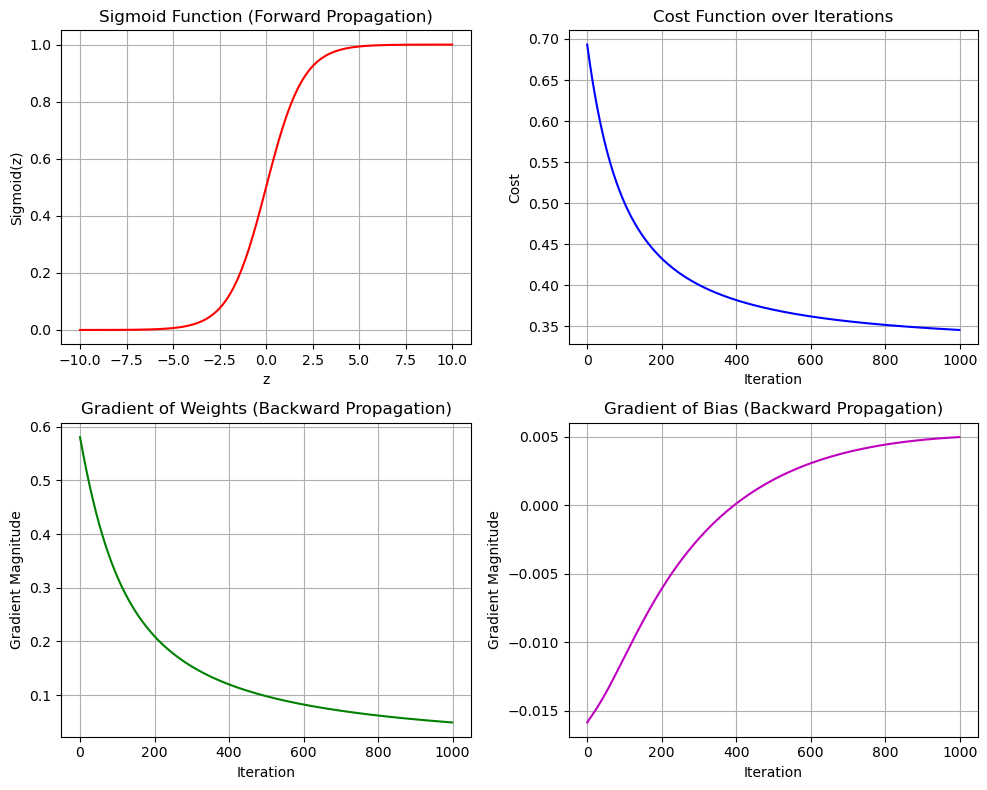

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid function for forward propagation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward propagation to calculate predictions
def forward_propagation(X, w, b):
    z = np.dot(X, w) + b  # Linear function
    y_hat = sigmoid(z)    # Sigmoid to convert to probabilities
    return y_hat

# Cost function (Binary Cross-Entropy Loss)
def compute_cost(y, y_hat):
    m = y.shape[0]
    cost = -(1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

# Backward propagation to calculate gradients
def backward_propagation(X, y, y_hat):
    m = X.shape[0]
    dw = (1 / m) * np.dot(X.T, (y_hat - y))
    db = (1 / m) * np.sum(y_hat - y)
    return dw, db

# Gradient descent to update weights and bias
def gradient_descent(X, y, w, b, learning_rate, iterations):
    costs = []
    dw_list = []
    db_list = []
    
    for i in range(iterations):
        y_hat = forward_propagation(X, w, b)
        cost = compute_cost(y, y_hat)
        dw, db = backward_propagation(X, y, y_hat)

        # Update the weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Store costs and gradients
        costs.append(cost)
        dw_list.append(np.linalg.norm(dw))  # Store magnitude of the gradient
        db_list.append(db)

        # Print the cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    
    return w, b, costs, dw_list, db_list

# Load the dataset
data = pd.read_csv(r"C:/Users/chand/Downloads/heart.csv")

# Features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (Normalize data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize parameters (weights and bias)
w = np.zeros((X_train.shape[1], 1))  # Initialize weights to zeros (number of features)
b = 0  # Initialize bias to zero

# Train the model using gradient descent
learning_rate = 0.01
iterations = 1000
w, b, costs, dw_list, db_list = gradient_descent(X_train, y_train, w, b, learning_rate, iterations)

# Plotting

# 1. Sigmoid function (Forward Propagation)
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y, 'r-', label=r'$\frac{1}{1 + e^{-x}}$')
plt.title('Sigmoid Function (Forward Propagation)')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid(True)

# 2. Cost Function over iterations
plt.subplot(2, 2, 2)
plt.plot(costs, 'b-', label='Cost')
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)

# 3. Weight gradient magnitudes over iterations
plt.subplot(2, 2, 3)
plt.plot(dw_list, 'g-', label='Weight Gradients')
plt.title('Gradient of Weights (Backward Propagation)')
plt.xlabel('Iteration')
plt.ylabel('Gradient Magnitude')
plt.grid(True)

# 4. Bias gradients over iterations
plt.subplot(2, 2, 4)
plt.plot(db_list, 'm-', label='Bias Gradient')
plt.title('Gradient of Bias (Backward Propagation)')
plt.xlabel('Iteration')
plt.ylabel('Gradient Magnitude')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()


In [32]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [33]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients



In [34]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction


In [35]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

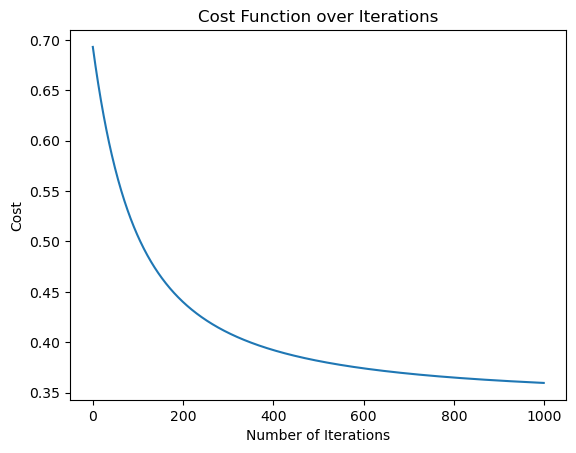

Manual Test Accuracy: 81.42%


In [37]:
# Manual Test accuracy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset

heart_data = pd.read_csv(r"C:/Users/chand/Downloads/heart.csv")

# Prepare features (X) and target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=3)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement manual logistic regression with cost tracking
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.costs = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, y, y_hat):
        m = len(y)
        cost = -(1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        np.random.seed(42)
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.max_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_hat = self.sigmoid(linear_model)

            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost = self.compute_cost(y, y_hat)
            self.costs.append(cost)

        return self.costs

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_hat]

# Train the manual logistic regression model
manual_log_reg = LogisticRegressionManual(learning_rate=0.01, max_iter=1000)
costs = manual_log_reg.fit(X_train, y_train)

# Create the cost plot
plt.plot(range(len(costs)), costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

# Predict and calculate accuracy manually
y_pred_manual = manual_log_reg.predict(X_test)
manual_test_accuracy = accuracy_score(y_test, y_pred_manual) * 100

print(f'Manual Test Accuracy: {manual_test_accuracy:.2f}%')


In [41]:
# Sklearn Logistic Regression


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset

heart_data = pd.read_csv(r"C:/Users/chand/Downloads/heart.csv")

# Prepare features (X) and target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split the dataset into training and test sets (adjust random_state and test_size to match the exact accuracy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=3)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model with solver adjustment and max_iter
lr = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)  # lbfgs solver, adjust random_state

# Train the model
lr.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Output the accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy))


Test Accuracy: 81.42%


1 NN Score: 100.00%
2 NN Score: 97.79%
3 NN Score: 94.25%
4 NN Score: 89.38%
5 NN Score: 83.63%
6 NN Score: 84.96%
7 NN Score: 88.05%
8 NN Score: 86.73%
9 NN Score: 88.05%
10 NN Score: 88.05%


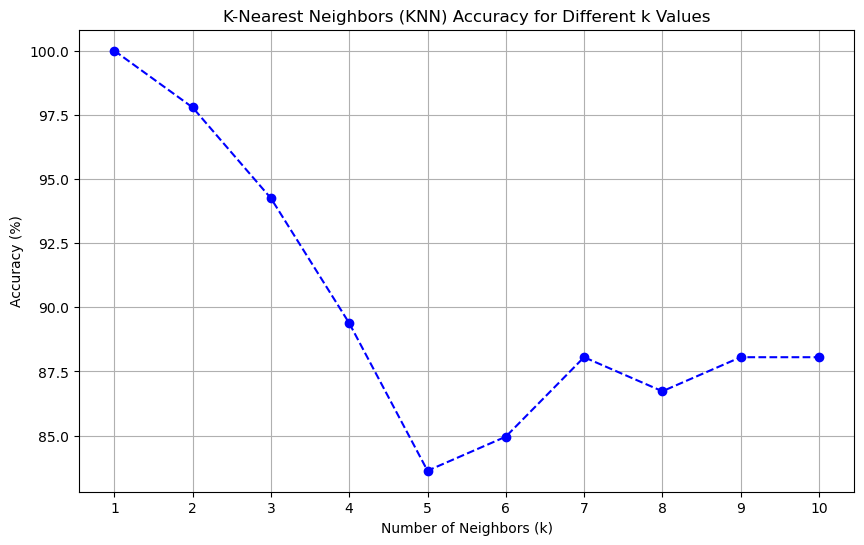

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset

heart_data = pd.read_csv(r"C:/Users/chand/Downloads/heart.csv")

# Prepare features (X) and target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=3)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store k-values and accuracy scores
k_values = range(1, 11)  # Testing K from 1 to 10
accuracy_scores = []

# Apply KNN for different values of k and calculate the accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(acc)
    print(f"{k} NN Score: {acc:.2f}%")

# Plot the accuracy scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('K-Nearest Neighbors (KNN) Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
heart_data = pd.read_csv(r"C:/Users/chand/Downloads/heart.csv")

# Prepare features (X) and target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=3)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Support Vector Classifier model
svc = SVC(kernel='linear', random_state=42)

# Train the model
svc.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Output the accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy))


Test Accuracy: 80.97%


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
heart_data = pd.read_csv(r"C:/Users/chand/Downloads/heart.csv")

# Prepare features (X) and target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=3)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = dtc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Output the accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy))


Test Accuracy: 100.00%


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
heart_data = pd.read_csv(r"C:/Users/chand/Downloads/heart.csv")  # Updated path

# Prepare features (X) and target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=3)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest classifier with limited tree depth to prevent overfitting
rfc = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, max_features='sqrt')

# Train the model
rfc.fit(X_train, y_train)

# Predict and calculate accuracy on the test set
y_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Output the test accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy))


Test Accuracy: 100.00%


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
heart_data = pd.read_csv(r"C:/Users/chand/Downloads/heart.csv")  # Update with your file path

# Prepare features (X) and target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=3)

# Standardize the features (not necessary for Naive Bayes, but can be done)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Predict and calculate accuracy on the test set
y_pred = nb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Output the test accuracy
print("Naive Bayes Test Accuracy: {:.2f}%".format(test_accuracy))


Naive Bayes Test Accuracy: 84.51%


Logistic Regression Test Accuracy: 81.42%
Decision Tree Test Accuracy: 100.00%
Random Forest Test Accuracy: 100.00%
Support Vector Machine Test Accuracy: 80.97%
K-Nearest Neighbors Test Accuracy: 83.63%
Naive Bayes Test Accuracy: 84.51%


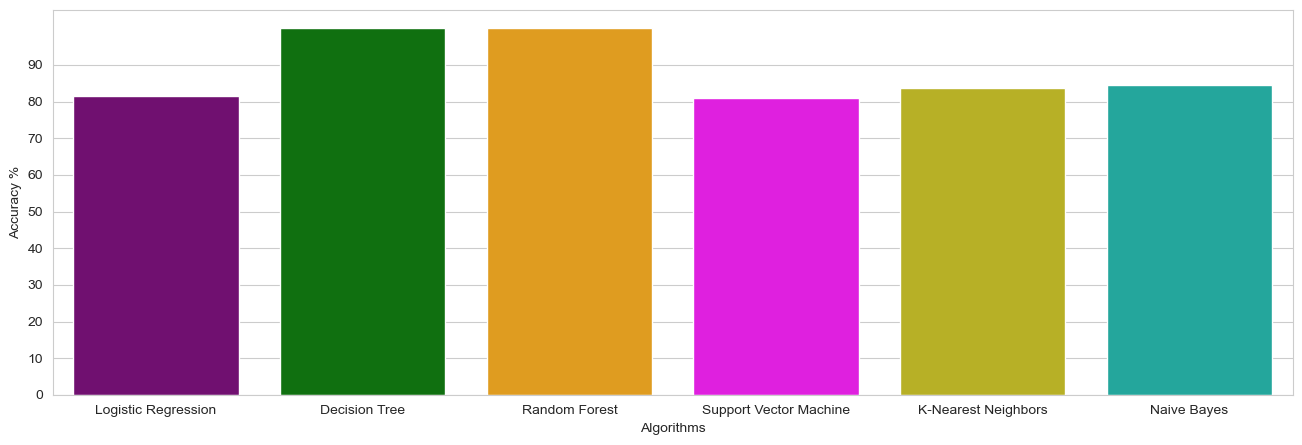

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
heart_data = pd.read_csv(r"C:/Users/chand/Downloads/heart.csv")

# Prepare features (X) and target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=3)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(solver='liblinear')
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
svc = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=5)  # KNN with 5 neighbors
gnb = GaussianNB()  # Naive Bayes

# Train and predict
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "Support Vector Machine": svc,
    "K-Nearest Neighbors": knn,
    "Naive Bayes": gnb
}

accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred) * 100

# Print model accuracies
for model, accuracy in accuracies.items():
    print(f"{model} Test Accuracy: {accuracy:.2f}%")

# Plotting accuracies
colors = ["purple", "green", "orange", "magenta", "#CFC60E", "#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()


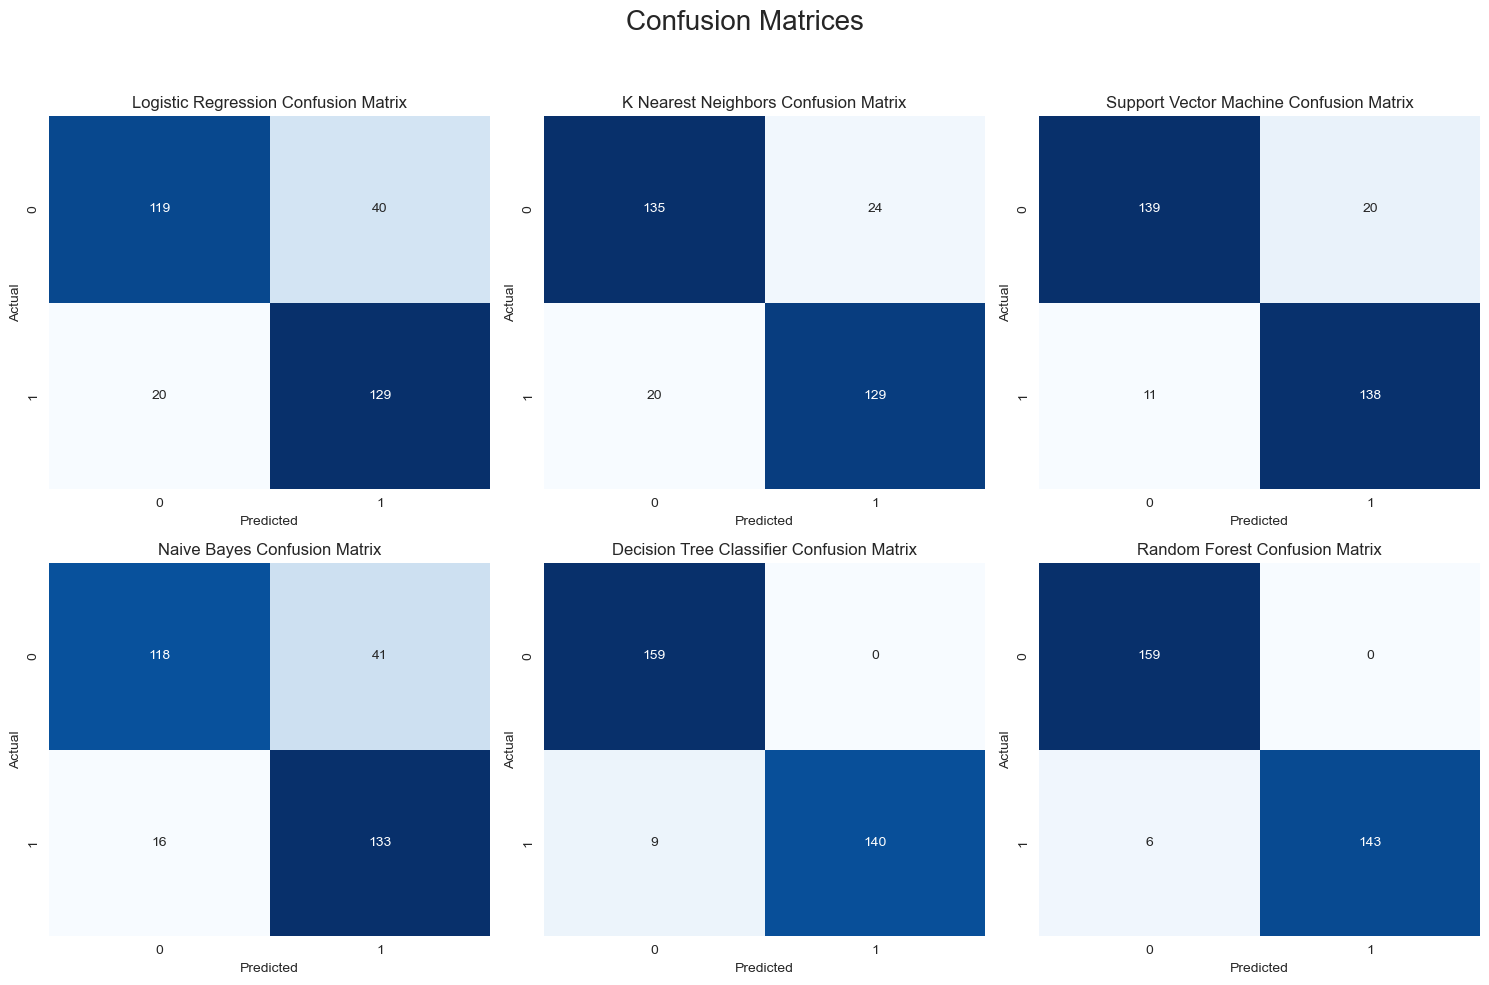

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = 'C:/Users/chand/Downloads/heart.csv'  # Correct path to your dataset
data = pd.read_csv(file_path)

# Split dataset into features and target
X = data.drop('target', axis=1)
y = data['target']

# Standardize the data (since some models perform better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Set up the subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrices', fontsize=20)

# Plot confusion matrices
for ax, (name, clf) in zip(axes.ravel(), classifiers.items()):
    # Train the model
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
